# Task 1: Data Exploration and Preparation

## 1.1 Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
# Display column names to identify the target variable
print("Column names in the dataset:\n", df.columns)

Column names in the dataset:
 Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')


In [ ]:
# Define the target variable
target_variable = 'y'

In [ ]:
# Calculate measures of central tendency and dispersion for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
central_tendency_dispersion = df[numerical_features].agg(['mean', 'median', 'std']).transpose()

In [ ]:
# Analyze frequencies for categorical features
categorical_features = df.select_dtypes(include=[object]).columns.tolist()
categorical_frequencies = {col: df[col].value_counts() for col in categorical_features}

In [ ]:
# Summarize findings in a report
print("Central Tendency and Dispersion:\n", central_tendency_dispersion)
for col, freq in categorical_frequencies.items():
    print(f"Frequencies for {col}:\n", freq)

Central Tendency and Dispersion:
                  mean  median         std
age         40.936210    39.0   10.618762
day         15.806419    16.0    8.322476
dur        258.163080   180.0  257.527812
num_calls    2.763841     2.0    3.098021
Frequencies for job:
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Frequencies for marital:
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Frequencies for education_qual:
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64
Frequencies for call_type:
 cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64
Frequencies for mon:
 may    13766
jul     6895
aug     6247
jun     5341
nov  

## 1.2 Handling Missing Values and Outliers

In [ ]:
# Identify missing values
missing_values = df.isnull().sum()

In [ ]:
# Handling missing values (example: filling with mean for numerical, mode for categorical)
df.fillna(df.mean(), inplace=True)
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Detecting outliers using Z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(df[numerical_features]))
outliers = (z_scores > 3).all(axis=1)

In [ ]:
# Handling outliers (example: capping at 95th percentile)
for col in numerical_features:
    upper_limit = df[col].quantile(0.95)
    lower_limit = df[col].quantile(0.05)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

print("Missing Values:\n", missing_values)
print("Outliers handled.")

Missing Values:
 age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64
Outliers handled.


## 1.3 Data Visualization

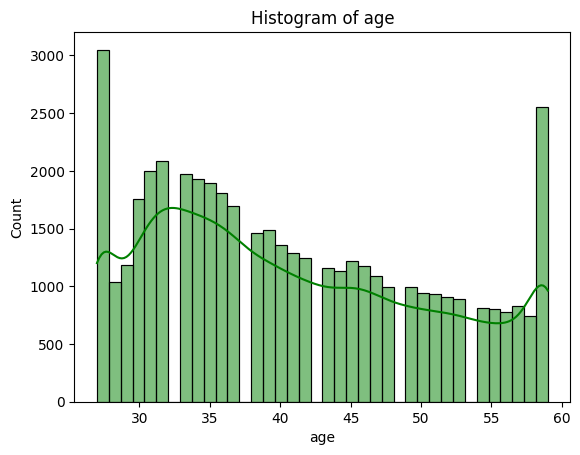

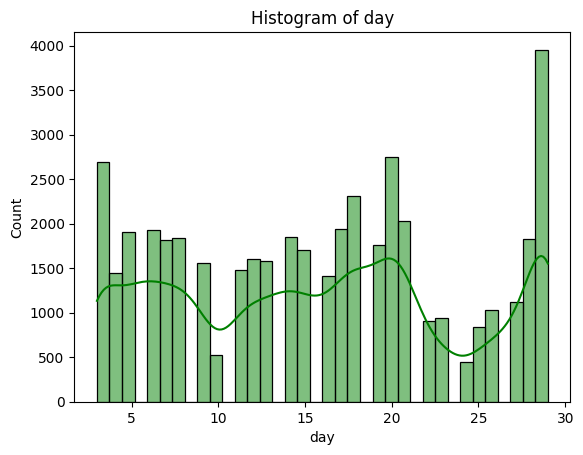

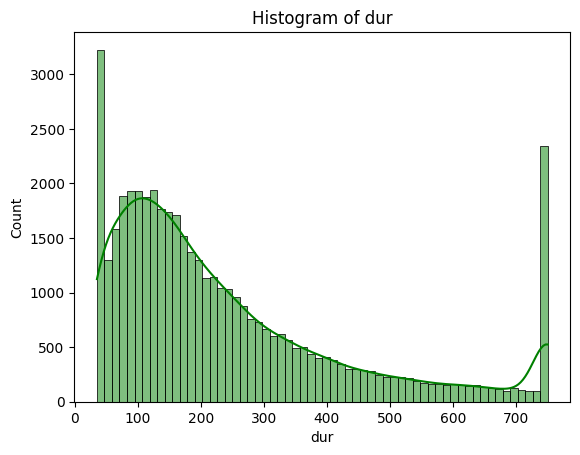

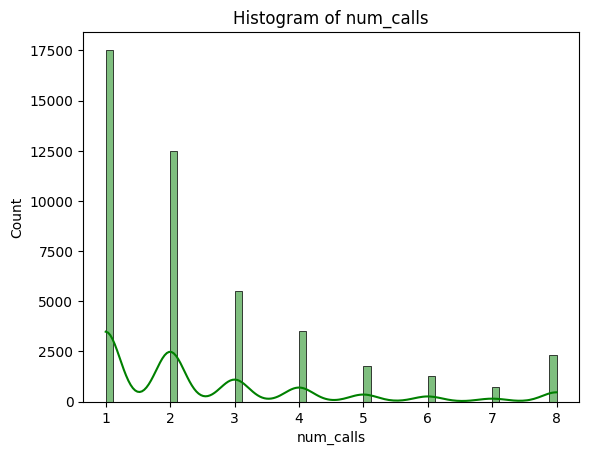

In [ ]:
# Histograms
for col in numerical_features:
    sns.histplot(df[col], kde=True, color='green')
    plt.title(f'Histogram of {col}')
    plt.show()

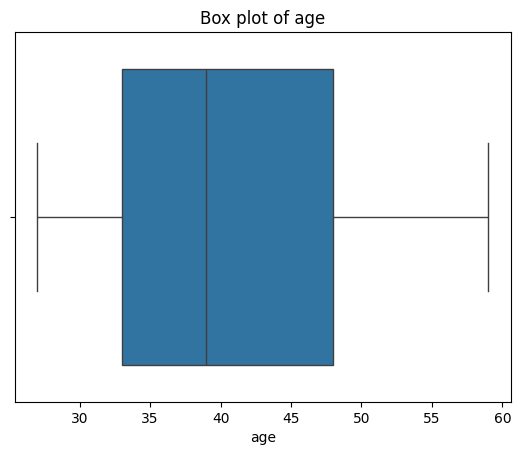

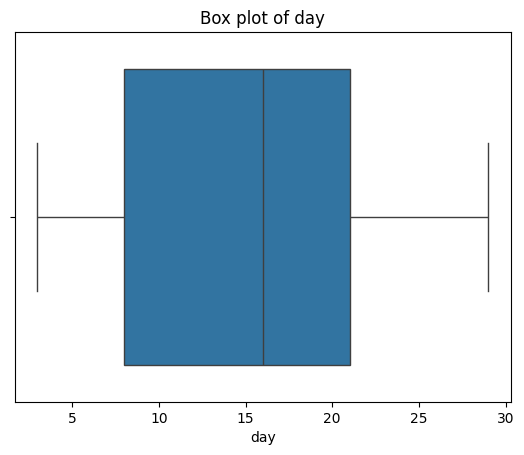

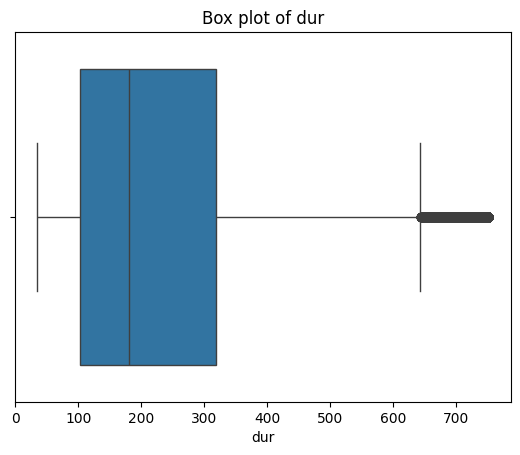

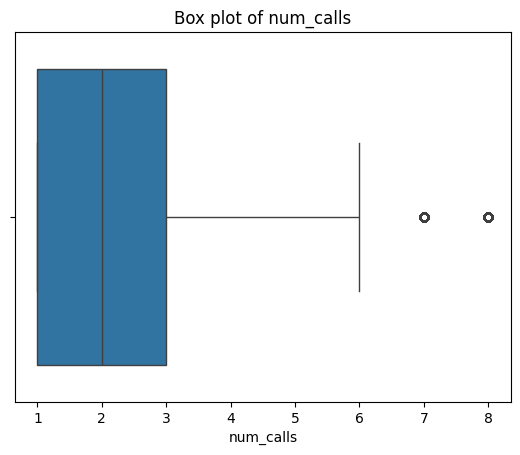

In [ ]:
# Box plots
for col in numerical_features:
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

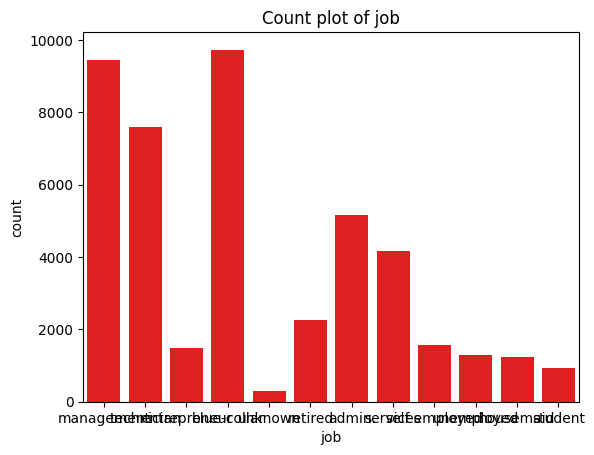

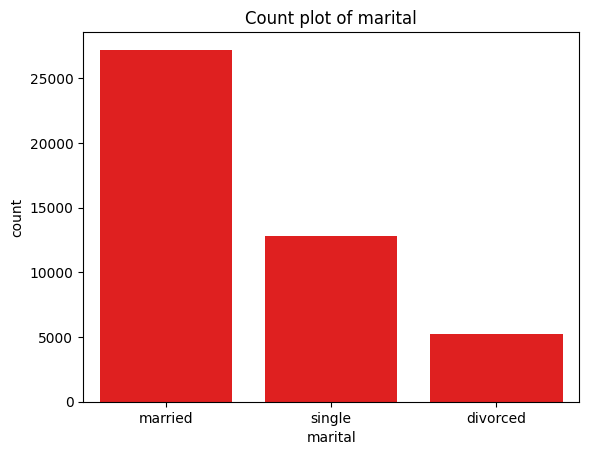

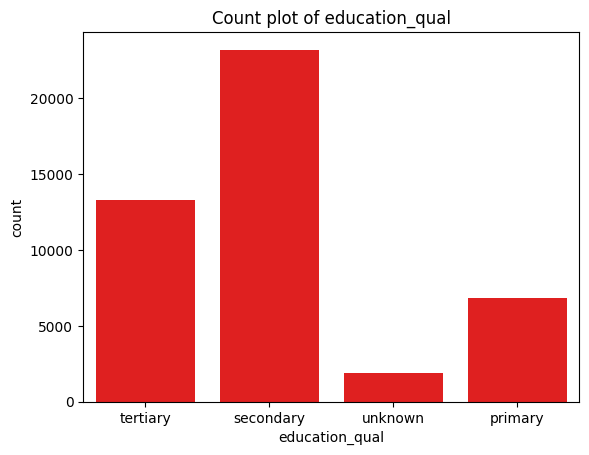

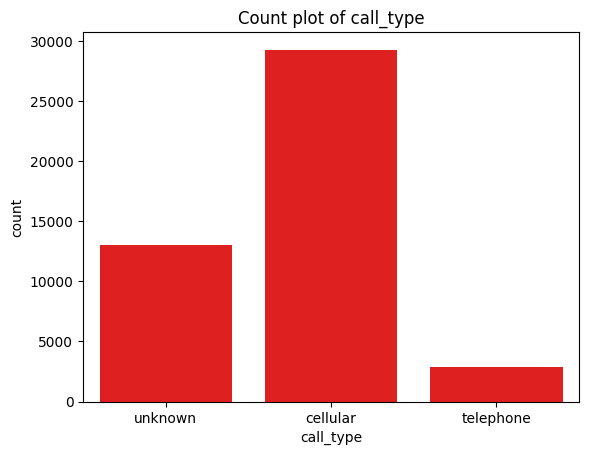

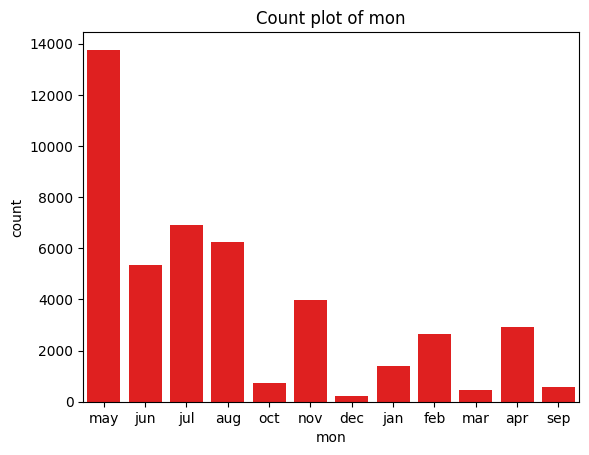

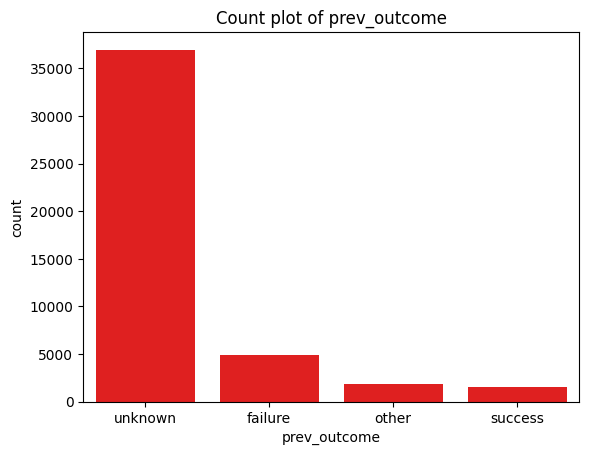

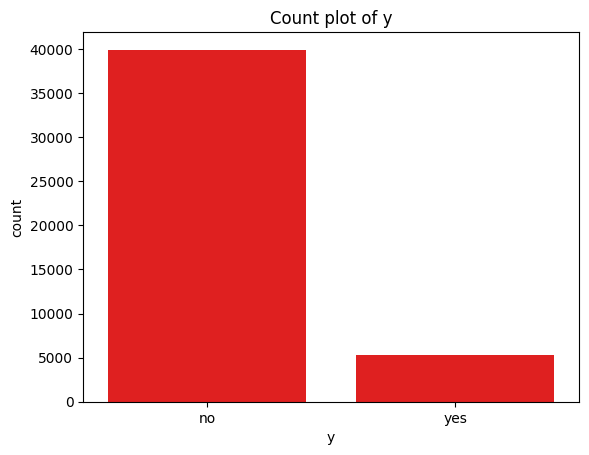

In [ ]:
# Categorical features visualizations with red color
for col in categorical_features:
    sns.countplot(x=df[col], color='red')
    plt.title(f'Count plot of {col}')
    plt.show()

### Label Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Task 2: Model Selection and Training

## 2.1 Model Selection

In [ ]:
# Import necessary libraries for model selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Describe and justify model selection
print("Selected Models: Logistic Regression, Random Forest")


Selected Models: Logistic Regression, Random Forest


## 2.2 Data Splitting

In [ ]:
# Define features and target variable
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the dataset (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Data splitting done. Training set and test set created.")


Data splitting done. Training set and test set created.


# Task 3: Model Interpretation and Evaluation

## 3.1 Model Interpretation

In [ ]:
# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

NameError: name 'LogisticRegression' is not defined

In [ ]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Calculate evaluation metrics for Logistic Regression
metrics_lr = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-Score": f1_score(y_test, y_pred_lr)
}

In [ ]:
# Calculate evaluation metrics for Random Forest
metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
}

In [ ]:
# Create a DataFrame for plotting
metrics_df = pd.DataFrame([metrics_lr, metrics_rf], index=["Logistic Regression", "Random Forest"])

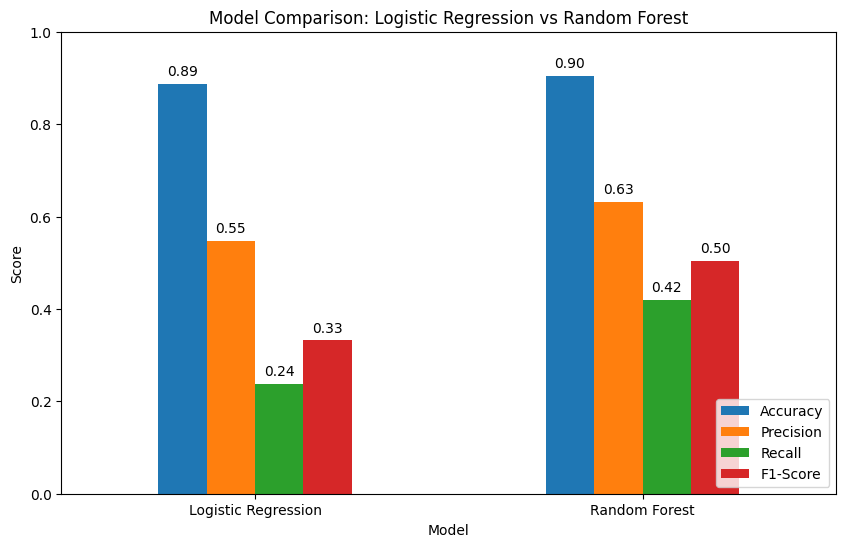

In [ ]:
# Plot the comparison graph with values inside the bars
ax = metrics_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1))
plt.title('Model Comparison: Logistic Regression vs Random Forest')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()